In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
data_train= pd.read_csv('train_blackFridaysale.csv')

In [4]:
dataCopyTrain = data_train.copy()

In [5]:
dataCopyTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
data_test = pd.read_csv('test_blackFridaysale.csv')

In [7]:
dataCopyTest = data_test.copy()

In [8]:
dataCopyTest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
## merge both train and test data 
# finaldata = dataCopyTrain.append(dataCopyTest)
finaldata = pd.concat([dataCopyTrain, dataCopyTest], ignore_index=True)


In [10]:
finaldata.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
finaldataCopy = finaldata.copy()

In [12]:
finaldataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [13]:
finaldataCopy.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
finaldataCopy.drop(['User_ID'],axis=1,inplace=True)

In [15]:
finaldataCopy.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
## handling categorical feature age
pd.get_dummies(finaldataCopy[['Gender']], dtype=int)


,Gender_F,Gender_M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,1,0


In [17]:
finaldataCopy['Gender'] = finaldataCopy['Gender'].map({'F':1,'M':0})

In [18]:
finaldataCopy.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [19]:
## handling the categorical feature age
finaldataCopy['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
finaldataCopy['Age'] = finaldataCopy['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [21]:
## fixing the city categorical
data_city=pd.get_dummies(finaldataCopy['City_Category'],drop_first=True)

In [22]:
data_city

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,False,True


In [23]:
finaldataCopy = pd.concat([finaldataCopy,data_city],axis=1)

In [24]:
finaldataCopy

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,1,3,15,B,4+,1,8,NaN,NaN,NaN,True,False
783663,P00254642,1,3,15,B,4+,1,5,8.0,NaN,NaN,True,False
783664,P00031842,1,3,15,B,4+,1,1,5.0,12.0,NaN,True,False
783665,P00124742,1,5,1,C,4+,0,10,16.0,NaN,NaN,False,True


In [25]:
finaldataCopy =finaldataCopy.drop('City_Category',axis=1)

In [26]:
finaldataCopy

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,0,7,16,4+,0,8,NaN,NaN,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,1,3,15,4+,1,8,NaN,NaN,NaN,True,False
783663,P00254642,1,3,15,4+,1,5,8.0,NaN,NaN,True,False
783664,P00031842,1,3,15,4+,1,1,5.0,12.0,NaN,True,False
783665,P00124742,1,5,1,4+,0,10,16.0,NaN,NaN,False,True


In [27]:
## missing values
finaldataCopy.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [28]:
## replacing missing values
finaldataCopy['Product_Category_2'] = finaldataCopy['Product_Category_2'].fillna(finaldataCopy['Product_Category_2'].mode()[0])
finaldataCopy['Product_Category_3'] = finaldataCopy['Product_Category_3'].fillna(finaldataCopy['Product_Category_3'].mode()[0])


In [29]:
finaldataCopy['Stay_In_Current_City_Years'] =finaldataCopy['Stay_In_Current_City_Years'].str.replace('+'," ")

In [30]:
finaldataCopy.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,1,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,1,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,0,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [31]:
finaldataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 61.3+ MB


In [32]:
finaldataCopy['Stay_In_Current_City_Years'] =finaldataCopy['Stay_In_Current_City_Years'].astype(int)

In [33]:
finaldataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int32(1), int64(5), object(1)
memory usage: 58.3

In [34]:
finaldataCopy['B'] = finaldataCopy['B'].astype(int)
finaldataCopy['C'] = finaldataCopy['C'].astype(int)

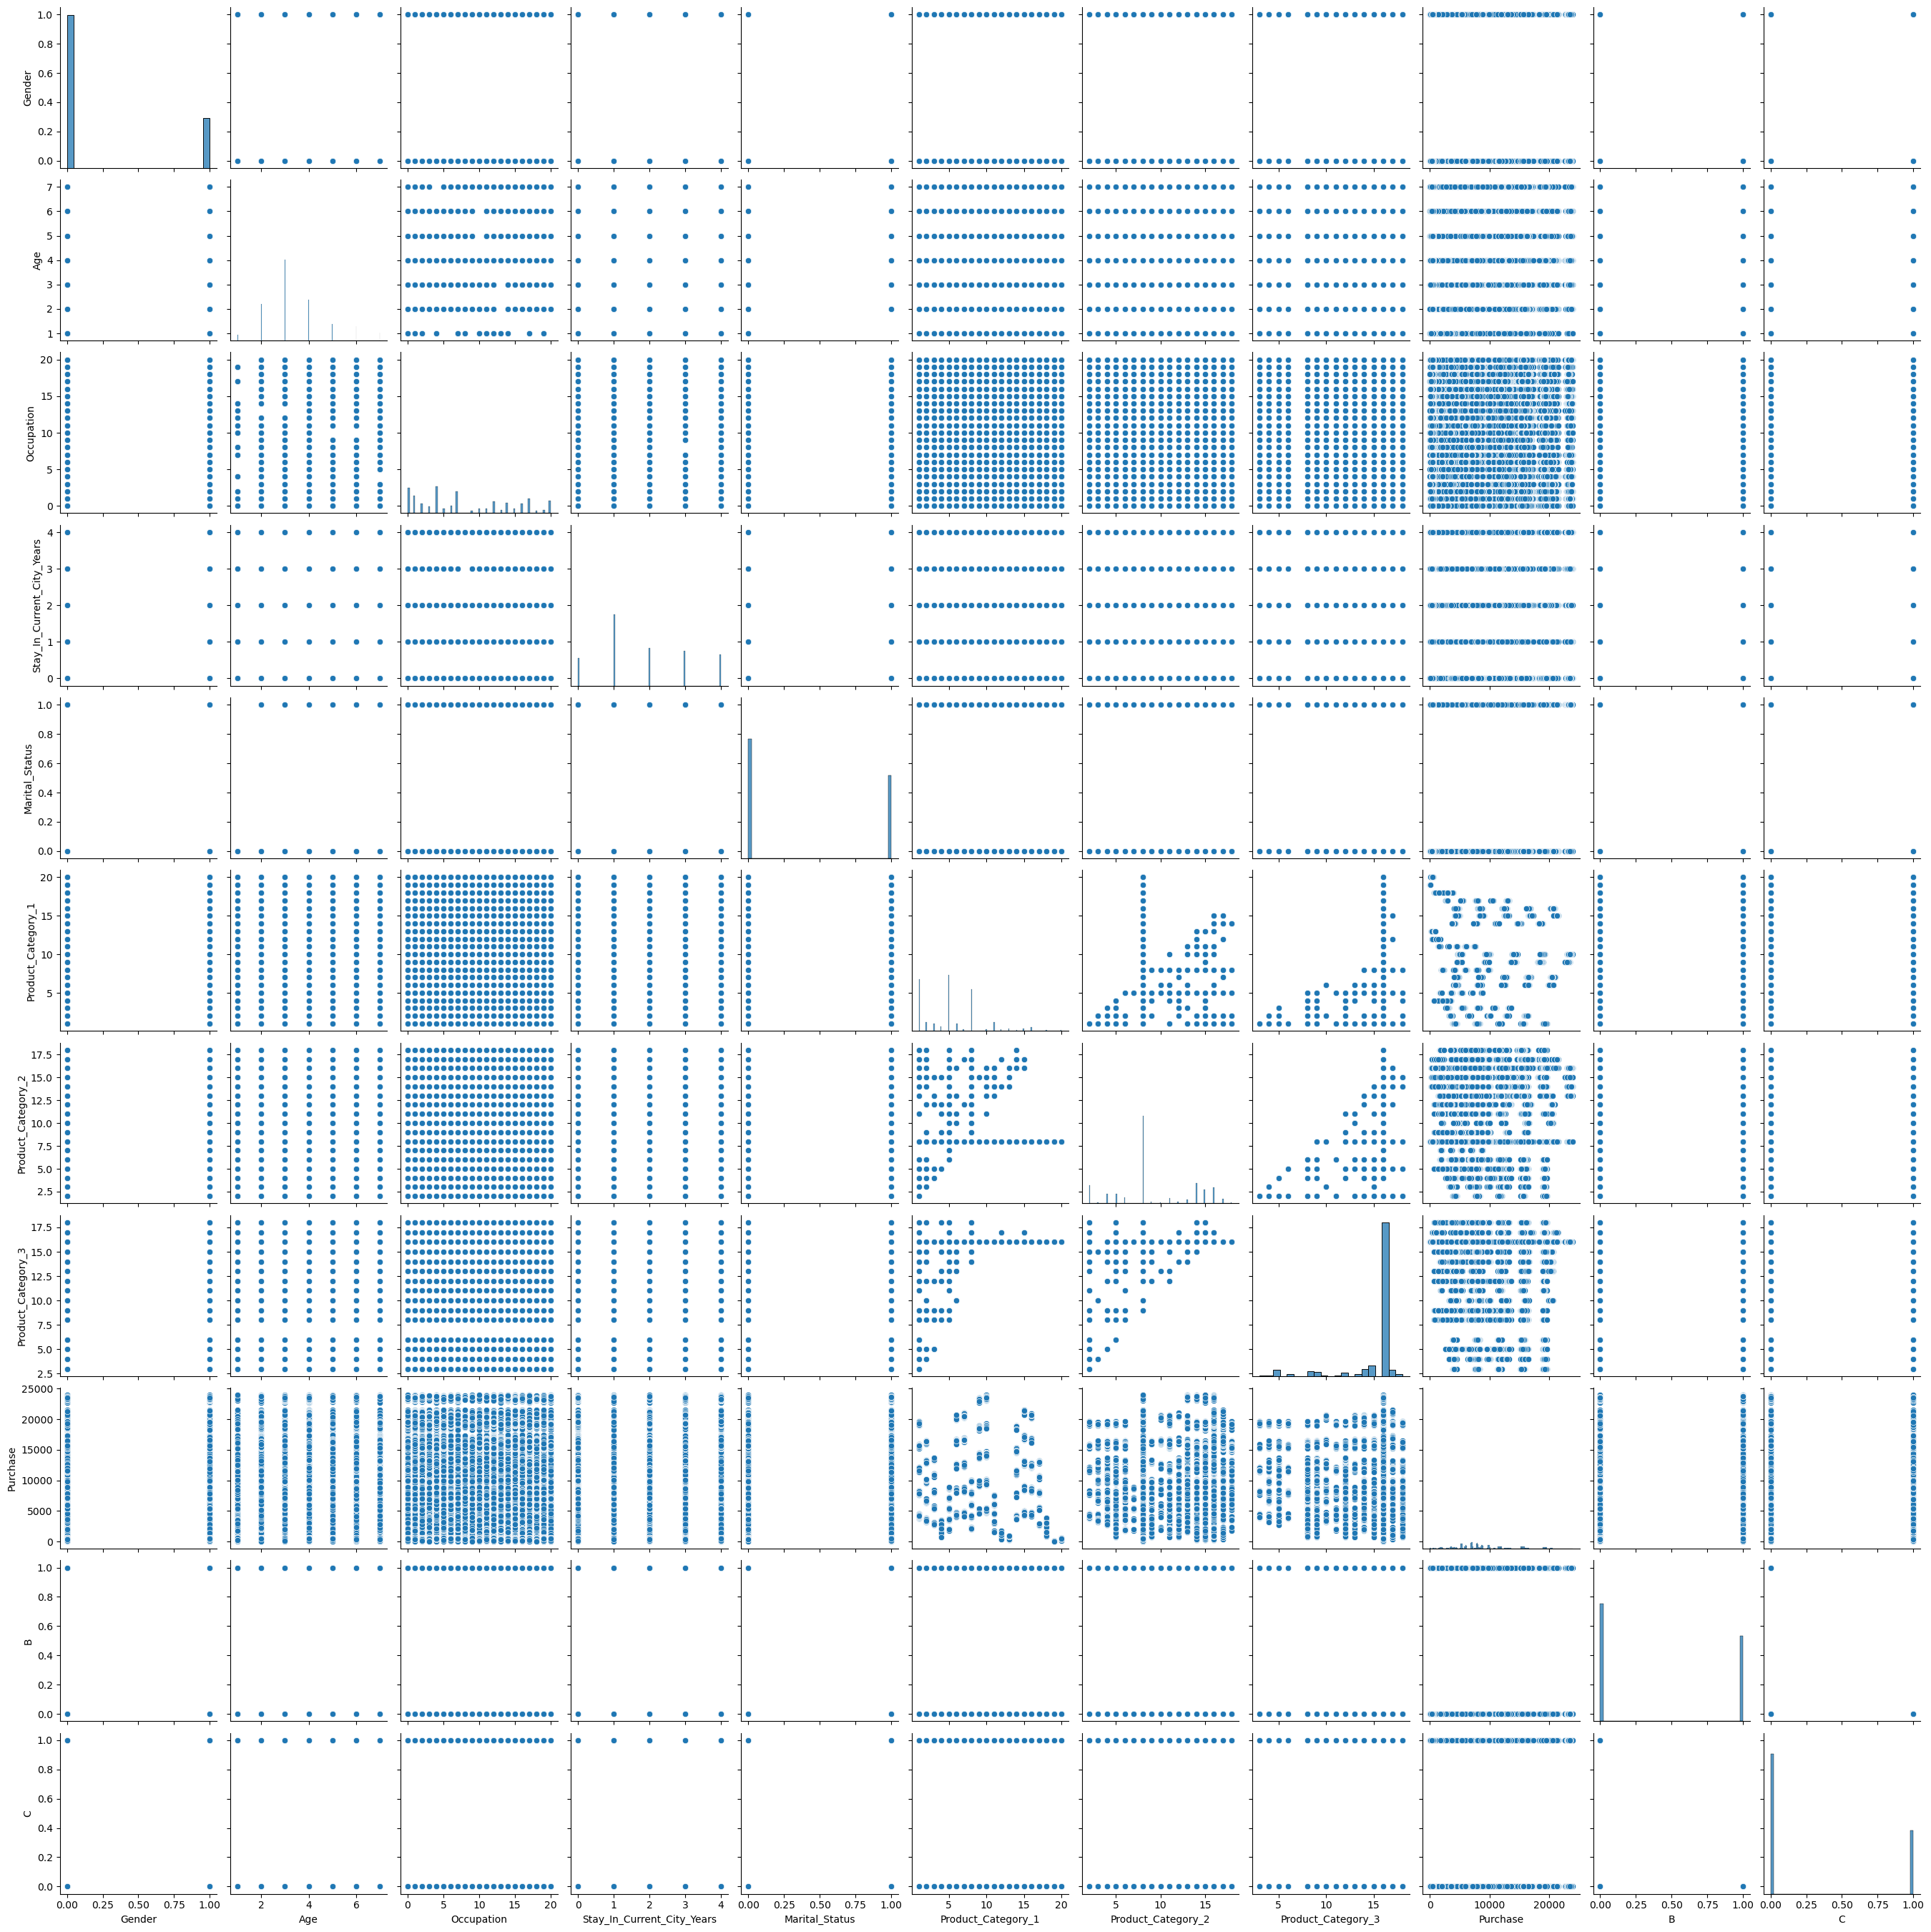

In [35]:
## visulisation
sns.pairplot(finaldataCopy)

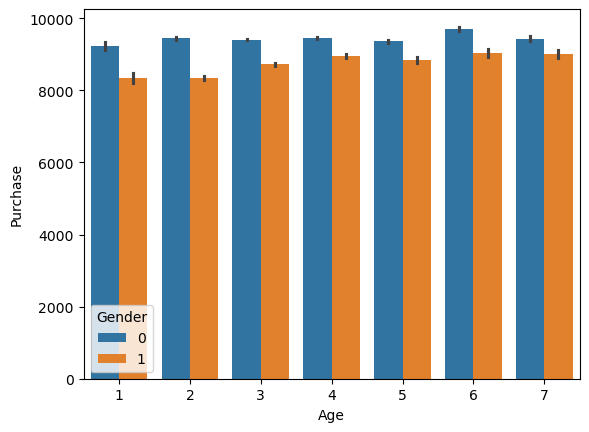

In [36]:
## age v/s purchase
sns.barplot(x='Age', y='Purchase', hue='Gender', data=finaldataCopy)
plt.show()

### observation
1. purchasing of man is high over women

In [38]:
finaldataCopy.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

<Axes: xlabel='Occupation', ylabel='Purchase'>

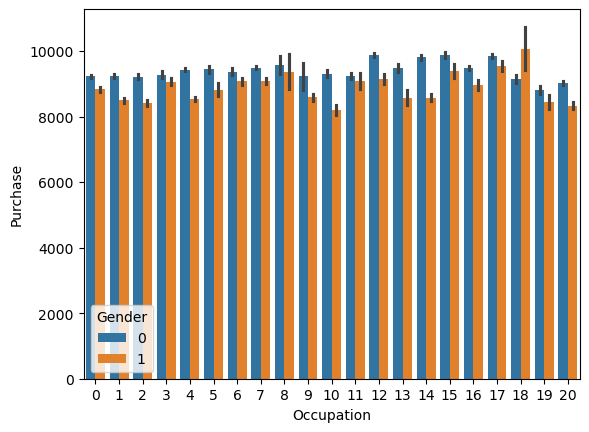

In [39]:
sns.barplot(x='Occupation',y='Purchase',data=finaldataCopy,hue='Gender')

In [51]:
finaldataCopy.drop('Product_ID',axis=1,inplace=True)

In [55]:
## feature scaling
test_data = finaldataCopy[finaldataCopy['Purchase'].isna()]

In [57]:
train_data = finaldataCopy[~finaldataCopy['Purchase'].isna()]

In [59]:
train_data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,1,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,0,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [61]:
test_data.head()


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,0,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,0,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,1,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,1,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,1,3,1,1,0,4,5.0,12.0,NaN,0,1


In [63]:
X = train_data.drop('Purchase',axis=1)

In [65]:
y=train_data['Purchase']

In [46]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,1,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,1,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,0,7,16,4,0,8,8.0,16.0,0,1


In [47]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
## feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)